In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Company_Data2015-1.xlsx')

In [3]:
df.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

In [4]:
df.shape

(3586, 67)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [6]:
df.drop('Co_Code', axis = 1, inplace = True)

## 1.2 Missing Value Treatment

In [7]:
df.isnull().sum().sum()

118

In [8]:
for col in df.columns:
    val = df[col].isnull().sum()
    if val > 0:
        print(col, ":", val)

Book Value (Adj.) (Unit Curr) : 4
Current Ratio[Latest] : 1
Fixed Assets Ratio[Latest] : 1
Inventory Ratio[Latest] : 1
Debtors Ratio[Latest] : 1
Total Asset Turnover Ratio[Latest] : 1
Interest Cover Ratio[Latest] : 1
PBIDTM (%)[Latest] : 1
PBITM (%)[Latest] : 1
PBDTM (%)[Latest] : 1
CPM (%)[Latest] : 1
APATM (%)[Latest] : 1
Inventory Velocity (Days) : 103


In [9]:
for col in df.columns:
    val = df[col].isnull().sum()
    if val > 0:
        df[col].fillna(method ='ffill', inplace = True)

In [10]:
df.isnull().sum().sum()

0

In [11]:
df_float = df.select_dtypes(include='float64')
df_float.columns.tolist()

['Networth Next Year',
 'Equity Paid Up',
 'Networth',
 'Capital Employed',
 'Total Debt',
 'Gross Block ',
 'Net Working Capital ',
 'Current Assets ',
 'Current Liabilities and Provisions ',
 'Total Assets/Liabilities ',
 'Gross Sales',
 'Net Sales',
 'Other Income',
 'Value Of Output',
 'Cost of Production',
 'Selling Cost',
 'PBIDT',
 'PBDT',
 'PBIT',
 'PBT',
 'PAT',
 'Adjusted PAT',
 'CP',
 'Revenue earnings in forex',
 'Revenue expenses in forex',
 'Capital expenses in forex',
 'Book Value (Unit Curr)',
 'Book Value (Adj.) (Unit Curr)',
 'Market Capitalisation',
 'CEPS (annualised) (Unit Curr)',
 'Cash Flow From Operating Activities',
 'Cash Flow From Investing Activities',
 'Cash Flow From Financing Activities',
 'ROG-Net Worth (%)',
 'ROG-Capital Employed (%)',
 'ROG-Gross Block (%)',
 'ROG-Gross Sales (%)',
 'ROG-Net Sales (%)',
 'ROG-Cost of Production (%)',
 'ROG-Total Assets (%)',
 'ROG-PBIDT (%)',
 'ROG-PBDT (%)',
 'ROG-PBIT (%)',
 'ROG-PBT (%)',
 'ROG-PAT (%)',
 'ROG-CP (

In [12]:
df_int = df.select_dtypes(include='int64')
df_int.columns.tolist()


['Debtors Velocity (Days)', 'Creditors Velocity (Days)']

In [13]:
df_numerical_colmns = df_int.columns.tolist() + df_float.columns.tolist()
len(df_numerical_colmns)


65

In [14]:
df.describe().T

count         mean           std      min  \
Networth Next Year            3586.0   725.045251   4769.681004 -8021.60   
Equity Paid Up                3586.0    62.966584    778.761744     0.00   
Networth                      3586.0   649.746299   4091.988792 -7027.48   
Capital Employed              3586.0  2799.611054  26975.135385 -1824.75   
Total Debt                    3586.0  1994.823779  23652.842746    -0.72   
...                              ...          ...           ...      ...   
Debtors Velocity (Days)       3586.0   603.894032  10636.759580     0.00   
Creditors Velocity (Days)     3586.0  2057.854992  54169.479197     0.00   
Inventory Velocity (Days)     3586.0    80.122421    139.349959  -199.00   
Value of Output/Total Assets  3586.0     0.819757      1.201400    -0.33   
Value of Output/Gross Block   3586.0    61.884548    976.824352   -61.00   

                                 25%     50%       75%         max  
Networth Next Year            3.9850  19.015  123.8025   111729.10  
Equity Paid Up                3.7500   8.290   19.5175    42263.46  
Networth                      3.8925  18.580  117.2975    81657.35  
Capital Employed              7.6025  39.090  226.6050   714001.25  
Total Debt                    0.0300   7.490   72.3500   652823.81  
...                              ...     ...       ...         ...  
Debtors Velocity (Days)       8.0000  49.000  106.0000   514721.00  
Creditors Velocity (Days)     8.0000  39.000   89.0000  2034145.00  
Inventory Velocity (Days)     0.0000  35.000   96.0000      996.00  
Value of Output/Total Assets  0.0700   0.480    1.1600       17.63  
Value of Output/Gross Block   0.2700   1.530    4.9100    43404.00  

[65 rows x 8 columns]

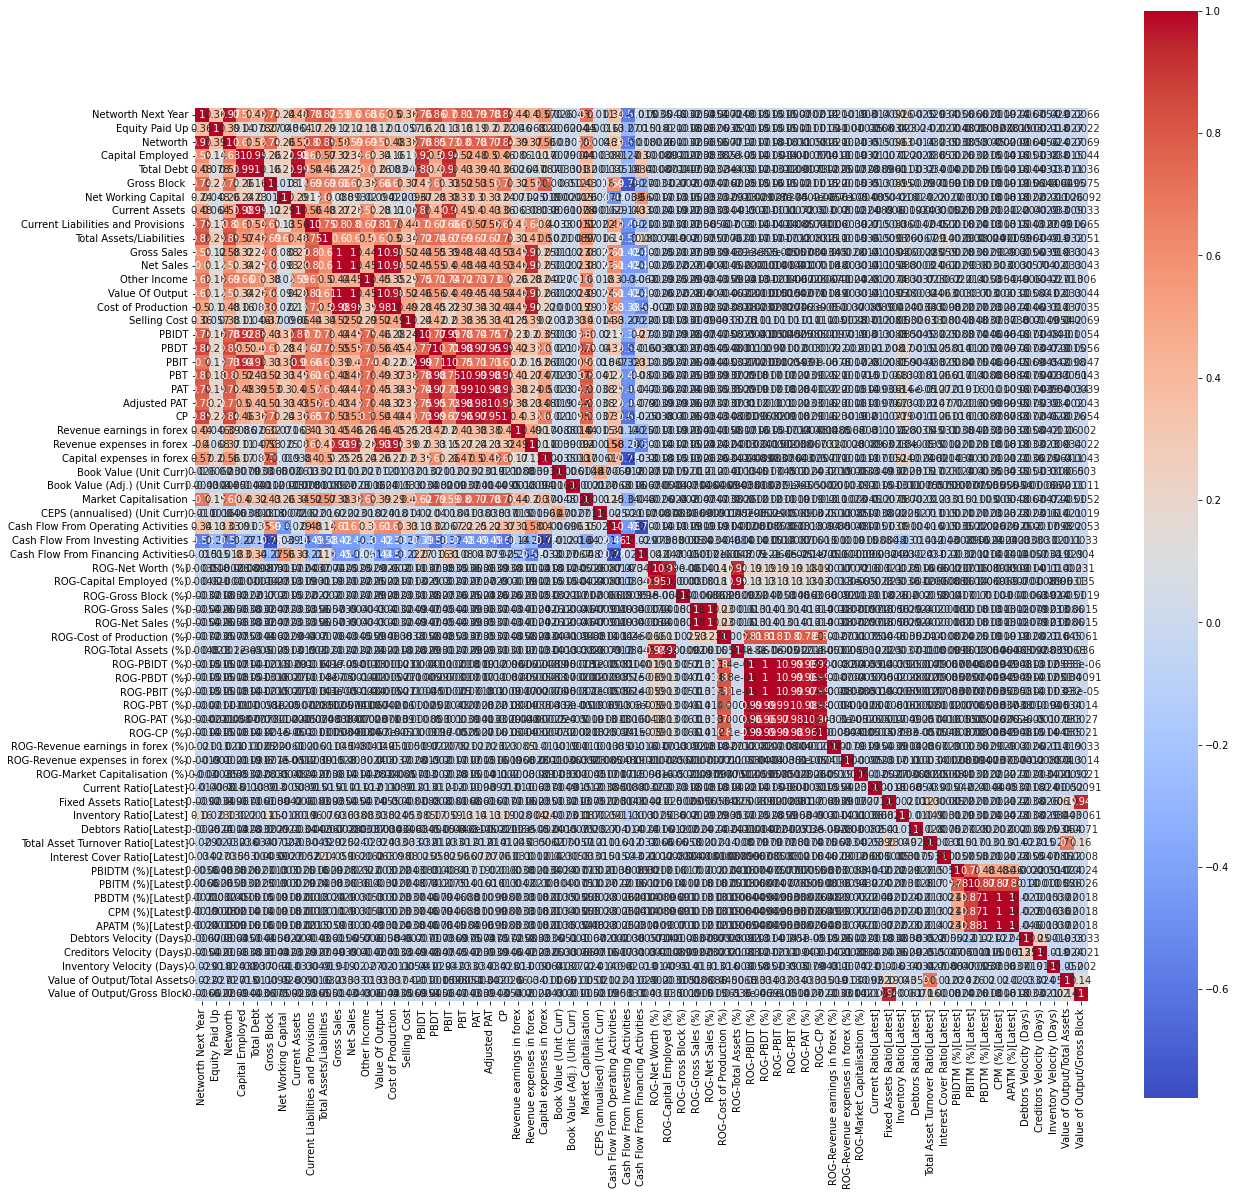

In [15]:
plt.figure(figsize=(20,20))  
p=sns.heatmap(df.corr(), annot=True,cmap='coolwarm',square=True)

<AxesSubplot:>

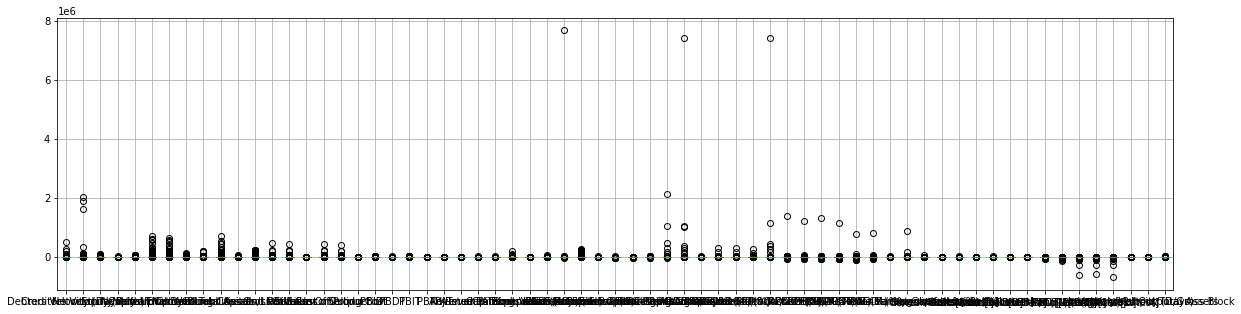

In [16]:
df.boxplot(column=df_numerical_colmns, figsize=(20, 5))


## Q 1.1 Outlier Treatment

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for column in df_numerical_colmns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

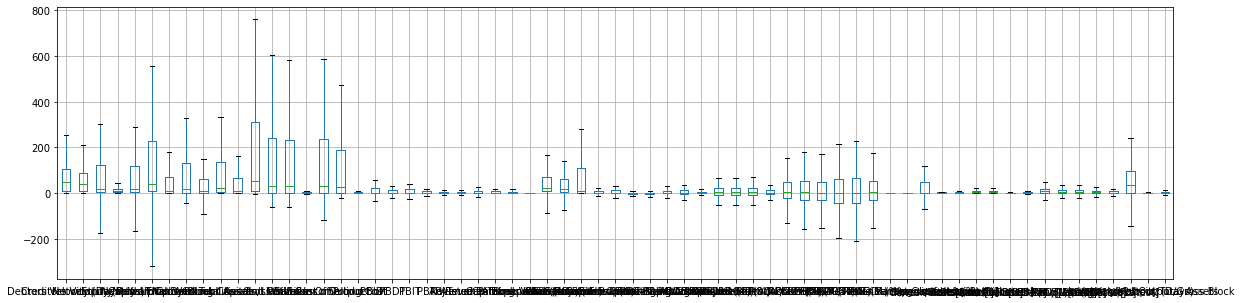

In [19]:
df.boxplot(column=df_numerical_colmns, figsize=(20, 5))

## 1.3 Transform Target variable into 0 and 1

In [20]:
df['default'] = np.where(df['Networth Next Year'] < 0, 1, 0)

In [21]:
df.head()

Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0      Hind.Cables          -175.74125        43.16875  -166.215   
1  Tata Tele. Mah.          -175.74125        43.16875  -166.215   
2     ABG Shipyard          -175.74125        43.16875   287.405   
3              GTL          -175.74125        43.16875  -166.215   
4  Bharati Defence          -175.74125        43.16875  -166.215   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0        -320.90125      180.83      328.8825             -89.40625   
1         555.10875      180.83      328.8825             -89.40625   
2         555.10875      180.83      328.8825             151.52375   
3         555.10875      180.83      328.8825             -89.40625   
4         555.10875      180.83      328.8825             151.52375   

   Current Assets   Current Liabilities and Provisions   ...  \
0         40.50000                            163.02625  ...   
1        332.19375                            163.02625  ...   
2        332.19375                            163.02625  ...   
3        332.19375                            163.02625  ...   
4        332.19375                            163.02625  ...   

   PBITM (%)[Latest]  PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0             0.0000               0.00          0.00000            0.00000   
1           -21.4275             -21.15        -17.08125          -11.11125   
2           -21.4275             -21.15        -17.08125          -11.11125   
3            -7.2100             -21.15        -17.08125          -11.11125   
4           -21.4275             -21.15         28.46875           18.51875   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                      0.0                        0.0   
1                     29.0                      101.0   
2                     97.0                      210.5   
3                     93.0                       63.0   
4                    253.0                      210.5   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  default  
0                         0.00        1  
1                         0.24        1  
2                        -0.26        1  
3                         1.90        1  
4                         0.05        1  

[5 rows x 67 columns]

In [22]:
df["default"].value_counts()

0    3199
1     387
Name: default, dtype: int64

In [23]:
df.default.sum() / len(df.default)

0.1079196876742889

## 1.5 Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('default', axis = 1)
y = df['default']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [27]:
X_train.shape

(2402, 66)

In [28]:
X_test.shape

(1184, 66)

## 1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

In [29]:
import statsmodels.formula.api as SM

In [30]:
df.columns =  ['Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up', 'Networth',
'Capital_Employed', 'Total_Debt', 'Gross_Block',
'Net_Working_Capital', 'Current_Assets',
'Current_Liabilities_and_Provisions', 'Total_Assets_Liabilities',
'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
'Market_Capitalisation', 'CEPS',
'Cash_Flow_From_Operating_Activities',
'Cash_Flow_From_Investing_Activities',
'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth',
'ROG_Capital_Employed', 'ROG_Gross_Block',
'ROG_Gross_Sales', 'ROG_Net_Sales',
'ROG_Cost_of_Production', 'ROG_Total_Assets', 'ROG_PBIDT',
'ROG_PBDT', 'ROG_PBIT', 'ROG_PBT', 'ROG_PAT',
'ROG_CP', 'ROG_Revenue_earnings_in_forex',
'ROG_Revenue_expenses_in_forex', 'ROG_Market_Capitalisation',
'Current_Ratio', 'Fixed_Assets_Ratio',
'Inventory_Ratio', 'Debtors_Ratio',
'Total_Asset_Turnover_Ratio', 'Interest_Cover_Ratio',
'PBIDTM', 'PBITM', 'PBDTM',
'CPM', 'APATM', 'Debtors_Velocity',
'Creditors_Velocity', 'Inventory_Velocity',
'Value_of_Output_Total_Assets', 'Value_of_Output_Gross_Block', 'default']

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
X = df.drop('default', axis = 1)
X = X.drop('Co_Name', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables          VIF
11                      Net_Sales  1698.110807
10                    Gross_Sales   958.954559
13                Value_Of_Output   694.733236
36                ROG_Gross_Sales   541.766075
37                  ROG_Net_Sales   541.256980
..                            ...          ...
48      ROG_Market_Capitalisation     1.672119
35                ROG_Gross_Block     1.581078
25      Capital_expenses_in_forex          NaN
46  ROG_Revenue_earnings_in_forex          NaN
47  ROG_Revenue_expenses_in_forex          NaN

[65 rows x 2 columns]

In [33]:
X = X.drop('Net_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
35                ROG_Gross_Sales  526.269398
36                  ROG_Net_Sales  525.320792
10                    Gross_Sales  416.060156
12                Value_Of_Output  405.126740
16                           PBDT  117.822842
..                            ...         ...
47      ROG_Market_Capitalisation    1.672119
34                ROG_Gross_Block    1.580922
24      Capital_expenses_in_forex         NaN
45  ROG_Revenue_earnings_in_forex         NaN
46  ROG_Revenue_expenses_in_forex         NaN

[64 rows x 2 columns]

In [34]:
X = X.drop('ROG_Gross_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
10                    Gross_Sales  411.030272
12                Value_Of_Output  400.540039
16                           PBDT  117.361995
9        Total_Assets_Liabilities  104.956585
21                             CP  104.146588
..                            ...         ...
46      ROG_Market_Capitalisation    1.671961
34                ROG_Gross_Block    1.578987
24      Capital_expenses_in_forex         NaN
44  ROG_Revenue_earnings_in_forex         NaN
45  ROG_Revenue_expenses_in_forex         NaN

[63 rows x 2 columns]

In [35]:
X = X.drop('Gross_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
15                           PBDT  117.343247
9        Total_Assets_Liabilities  104.933050
20                             CP  104.127723
18                            PAT   76.538077
17                            PBT   75.288523
..                            ...         ...
45      ROG_Market_Capitalisation    1.671258
33                ROG_Gross_Block    1.578896
23      Capital_expenses_in_forex         NaN
43  ROG_Revenue_earnings_in_forex         NaN
44  ROG_Revenue_expenses_in_forex         NaN

[62 rows x 2 columns]

In [36]:
X = X.drop('PBDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
9        Total_Assets_Liabilities  104.838789
3                Capital_Employed   73.198722
17                            PAT   67.353895
11                Value_Of_Output   58.377727
16                            PBT   55.307956
..                            ...         ...
44      ROG_Market_Capitalisation    1.671223
32                ROG_Gross_Block    1.578657
22      Capital_expenses_in_forex         NaN
42  ROG_Revenue_earnings_in_forex         NaN
43  ROG_Revenue_expenses_in_forex         NaN

[61 rows x 2 columns]

In [37]:
X = X.drop('Total_Assets_Liabilities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
16                                  PAT  67.331583
10                      Value_Of_Output  58.297132
15                                  PBT  55.278927
11                   Cost_of_Production  47.033674
53                                  CPM  32.933892
50                               PBIDTM  32.487489
13                                PBIDT  31.635263
7                        Current_Assets  31.170422
51                                PBITM  30.183739
14                                 PBIT  29.245237
2                              Networth  28.561719
52                                PBDTM  27.602160
36                             ROG_PBDT  24.383988
3                      Capital_Employed  24.187413
0                    Networth_Next_Year  22.631710
18                                   CP  20.185253
38                              ROG_PBT  19.385836
54                                APATM  19.375018
8    Current_Liabilities_and_Provisions  18.130887
40                               ROG_CP  17.917973
22                 Book_Value_Unit_Curr  17.491541
17                         Adjusted_PAT  17.276154
35                            ROG_PBIDT  15.066095
39                              ROG_PAT  14.721126
23             Book_Value_Adj_Unit_Curr  13.890752
58         Value_of_Output_Total_Assets  12.631520
37                             ROG_PBIT  12.452735
5                           Gross_Block  12.257884
48           Total_Asset_Turnover_Ratio  11.052634
59          Value_of_Output_Gross_Block   8.861024
45                   Fixed_Assets_Ratio   8.612494
4                            Total_Debt   7.321846
25                                 CEPS   6.687691
6                   Net_Working_Capital   5.144671
1                        Equity_Paid_Up   4.611527
24                Market_Capitalisation   4.581242
12                         Selling_Cost   4.518598
9                          Other_Income   4.492578
30                 ROG_Capital_Employed   4.015987
20            Revenue_expenses_in_forex   3.837857
26  Cash_Flow_From_Operating_Activities   3.765205
34                     ROG_Total_Assets   3.367383
19            Revenue_earnings_in_forex   3.104602
29                        ROG_Net_Worth   2.951216
28  Cash_Flow_From_Financing_Activities   2.915711
49                 Interest_Cover_Ratio   2.539174
47                        Debtors_Ratio   2.535027
55                     Debtors_Velocity   2.481578
27  Cash_Flow_From_Investing_Activities   2.475144
44                        Current_Ratio   2.402801
46                      Inventory_Ratio   2.372611
56                   Creditors_Velocity   2.318685
32                        ROG_Net_Sales   2.149873
33               ROG_Cost_of_Production   2.028559
57                   Inventory_Velocity   1.904117
43            ROG_Market_Capitalisation   1.671213
31                      ROG_Gross_Block   1.578097
21            Capital_expenses_in_forex        NaN
41        ROG_Revenue_earnings_in_forex        NaN
42        ROG_Revenue_expenses_in_forex        NaN

In [38]:
X = X.drop('PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
10                      Value_Of_Output  58.167025
11                   Cost_of_Production  47.012727
52                                  CPM  32.933560
49                               PBIDTM  32.487358
13                                PBIDT  31.501976
7                        Current_Assets  31.169604
50                                PBITM  30.177931
14                                 PBIT  29.244966
2                              Networth  28.543552
51                                PBDTM  27.598067
35                             ROG_PBDT  24.380651
3                      Capital_Employed  24.087635
0                    Networth_Next_Year  22.627332
15                                  PBT  21.757044
53                                APATM  19.362611
37                              ROG_PBT  18.980904
17                                   CP  18.740209
8    Current_Liabilities_and_Provisions  18.112203
39                               ROG_CP  17.906048
21                 Book_Value_Unit_Curr  17.472355
34                            ROG_PBIDT  15.058750
16                         Adjusted_PAT  14.909945
38                              ROG_PAT  14.144727
22             Book_Value_Adj_Unit_Curr  13.879677
57         Value_of_Output_Total_Assets  12.628171
36                             ROG_PBIT  12.449599
5                           Gross_Block  12.221326
47           Total_Asset_Turnover_Ratio  11.052198
58          Value_of_Output_Gross_Block   8.859605
44                   Fixed_Assets_Ratio   8.609087
4                            Total_Debt   7.316399
24                                 CEPS   6.680217
6                   Net_Working_Capital   5.144546
1                        Equity_Paid_Up   4.605343
23                Market_Capitalisation   4.579601
12                         Selling_Cost   4.518583
9                          Other_Income   4.445572
29                 ROG_Capital_Employed   4.015983
19            Revenue_expenses_in_forex   3.837332
25  Cash_Flow_From_Operating_Activities   3.765203
33                     ROG_Total_Assets   3.367380
18            Revenue_earnings_in_forex   3.099810
28                        ROG_Net_Worth   2.927340
27  Cash_Flow_From_Financing_Activities   2.915624
48                 Interest_Cover_Ratio   2.537703
46                        Debtors_Ratio   2.533227
54                     Debtors_Velocity   2.480671
26  Cash_Flow_From_Investing_Activities   2.475143
43                        Current_Ratio   2.401773
45                      Inventory_Ratio   2.372042
55                   Creditors_Velocity   2.316583
31                        ROG_Net_Sales   2.148178
32               ROG_Cost_of_Production   2.028072
56                   Inventory_Velocity   1.903509
42            ROG_Market_Capitalisation   1.670957
30                      ROG_Gross_Block   1.577765
20            Capital_expenses_in_forex        NaN
40        ROG_Revenue_earnings_in_forex        NaN
41        ROG_Revenue_expenses_in_forex        NaN

In [39]:
X = X.drop('Value_Of_Output', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
51                                  CPM  32.737918
48                               PBIDTM  32.205015
7                        Current_Assets  31.126404
12                                PBIDT  30.469938
49                                PBITM  30.006866
13                                 PBIT  29.239385
2                              Networth  28.528432
50                                PBDTM  27.588028
34                             ROG_PBDT  24.376358
3                      Capital_Employed  24.023403
0                    Networth_Next_Year  22.625873
14                                  PBT  21.718192
52                                APATM  19.249309
36                              ROG_PBT  18.978340
16                                   CP  18.736488
38                               ROG_CP  17.904024
8    Current_Liabilities_and_Provisions  17.625280
20                 Book_Value_Unit_Curr  17.472186
33                            ROG_PBIDT  15.043603
15                         Adjusted_PAT  14.846353
37                              ROG_PAT  14.142516
21             Book_Value_Adj_Unit_Curr  13.877062
56         Value_of_Output_Total_Assets  12.628127
35                             ROG_PBIT  12.447690
5                           Gross_Block  12.005999
10                   Cost_of_Production  11.993965
46           Total_Asset_Turnover_Ratio  11.045891
57          Value_of_Output_Gross_Block   8.811455
43                   Fixed_Assets_Ratio   8.572038
4                            Total_Debt   7.314271
23                                 CEPS   6.679538
6                   Net_Working_Capital   5.144291
1                        Equity_Paid_Up   4.590714
22                Market_Capitalisation   4.577482
11                         Selling_Cost   4.422975
9                          Other_Income   4.393330
28                 ROG_Capital_Employed   4.015973
18            Revenue_expenses_in_forex   3.836002
24  Cash_Flow_From_Operating_Activities   3.745210
32                     ROG_Total_Assets   3.367101
17            Revenue_earnings_in_forex   3.090320
27                        ROG_Net_Worth   2.927339
26  Cash_Flow_From_Financing_Activities   2.915505
45                        Debtors_Ratio   2.531732
47                 Interest_Cover_Ratio   2.529508
25  Cash_Flow_From_Investing_Activities   2.472515
53                     Debtors_Velocity   2.466433
42                        Current_Ratio   2.401215
44                      Inventory_Ratio   2.372037
54                   Creditors_Velocity   2.311508
30                        ROG_Net_Sales   2.145938
31               ROG_Cost_of_Production   2.027470
55                   Inventory_Velocity   1.896011
41            ROG_Market_Capitalisation   1.670539
29                      ROG_Gross_Block   1.577557
19            Capital_expenses_in_forex        NaN
39        ROG_Revenue_earnings_in_forex        NaN
40        ROG_Revenue_expenses_in_forex        NaN

In [40]:
X = X.drop('CPM', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
7                        Current_Assets  31.049579
12                                PBIDT  30.463824
13                                 PBIT  29.238336
2                              Networth  28.528131
48                               PBIDTM  25.406500
34                             ROG_PBDT  24.373159
3                      Capital_Employed  24.021103
0                    Networth_Next_Year  22.619701
49                                PBITM  21.979315
14                                  PBT  21.664138
36                              ROG_PBT  18.970669
16                                   CP  18.697424
38                               ROG_CP  17.901659
50                                PBDTM  17.709681
8    Current_Liabilities_and_Provisions  17.625277
20                 Book_Value_Unit_Curr  17.463807
33                            ROG_PBIDT  15.043009
15                         Adjusted_PAT  14.844736
37                              ROG_PAT  14.141093
21             Book_Value_Adj_Unit_Curr  13.876421
55         Value_of_Output_Total_Assets  12.620287
35                             ROG_PBIT  12.443693
5                           Gross_Block  12.005997
10                   Cost_of_Production  11.993866
46           Total_Asset_Turnover_Ratio  11.045524
51                                APATM  10.597817
56          Value_of_Output_Gross_Block   8.801527
43                   Fixed_Assets_Ratio   8.571212
4                            Total_Debt   7.309075
23                                 CEPS   6.658040
6                   Net_Working_Capital   5.144095
1                        Equity_Paid_Up   4.590050
22                Market_Capitalisation   4.573442
11                         Selling_Cost   4.419160
9                          Other_Income   4.390893
28                 ROG_Capital_Employed   4.015418
18            Revenue_expenses_in_forex   3.832786
24  Cash_Flow_From_Operating_Activities   3.739345
32                     ROG_Total_Assets   3.365296
17            Revenue_earnings_in_forex   3.090214
27                        ROG_Net_Worth   2.927254
26  Cash_Flow_From_Financing_Activities   2.915338
45                        Debtors_Ratio   2.531688
47                 Interest_Cover_Ratio   2.490466
25  Cash_Flow_From_Investing_Activities   2.471635
52                     Debtors_Velocity   2.456426
42                        Current_Ratio   2.392372
44                      Inventory_Ratio   2.369510
53                   Creditors_Velocity   2.311320
30                        ROG_Net_Sales   2.145938
31               ROG_Cost_of_Production   2.027451
54                   Inventory_Velocity   1.893284
41            ROG_Market_Capitalisation   1.670528
29                      ROG_Gross_Block   1.577511
19            Capital_expenses_in_forex        NaN
39        ROG_Revenue_earnings_in_forex        NaN
40        ROG_Revenue_expenses_in_forex        NaN

In [41]:
X = X.drop('Current_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
11                                PBIDT  30.442806
12                                 PBIT  29.210009
2                              Networth  28.374375
47                               PBIDTM  25.392244
33                             ROG_PBDT  24.364947
0                    Networth_Next_Year  22.618486
48                                PBITM  21.965781
13                                  PBT  21.612092
3                      Capital_Employed  21.446392
35                              ROG_PBT  18.953240
15                                   CP  18.696477
37                               ROG_CP  17.901620
49                                PBDTM  17.708129
19                 Book_Value_Unit_Curr  17.459229
32                            ROG_PBIDT  15.041383
14                         Adjusted_PAT  14.673367
36                              ROG_PAT  14.137656
20             Book_Value_Adj_Unit_Curr  13.861873
54         Value_of_Output_Total_Assets  12.601713
34                             ROG_PBIT  12.439904
5                           Gross_Block  11.785176
9                    Cost_of_Production  11.457446
45           Total_Asset_Turnover_Ratio  11.036271
7    Current_Liabilities_and_Provisions  10.994809
50                                APATM  10.587583
55          Value_of_Output_Gross_Block   8.755982
42                   Fixed_Assets_Ratio   8.534432
4                            Total_Debt   7.236792
22                                 CEPS   6.654615
1                        Equity_Paid_Up   4.589843
21                Market_Capitalisation   4.569405
10                         Selling_Cost   4.418127
8                          Other_Income   4.361081
27                 ROG_Capital_Employed   4.015168
17            Revenue_expenses_in_forex   3.832061
23  Cash_Flow_From_Operating_Activities   3.728478
6                   Net_Working_Capital   3.550057
31                     ROG_Total_Assets   3.361365
16            Revenue_earnings_in_forex   3.089726
26                        ROG_Net_Worth   2.926781
25  Cash_Flow_From_Financing_Activities   2.915170
44                        Debtors_Ratio   2.527929
46                 Interest_Cover_Ratio   2.487625
24  Cash_Flow_From_Investing_Activities   2.470368
51                     Debtors_Velocity   2.450514
41                        Current_Ratio   2.389099
43                      Inventory_Ratio   2.360241
52                   Creditors_Velocity   2.310757
29                        ROG_Net_Sales   2.145840
30               ROG_Cost_of_Production   2.027106
53                   Inventory_Velocity   1.893015
40            ROG_Market_Capitalisation   1.669023
28                      ROG_Gross_Block   1.577086
18            Capital_expenses_in_forex        NaN
38        ROG_Revenue_earnings_in_forex        NaN
39        ROG_Revenue_expenses_in_forex        NaN

In [42]:
X = X.drop('PBIDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
2                              Networth  28.110863
46                               PBIDTM  25.060591
32                             ROG_PBDT  24.250046
0                    Networth_Next_Year  22.615186
47                                PBITM  21.817017
3                      Capital_Employed  21.429096
12                                  PBT  21.175493
34                              ROG_PBT  18.878963
36                               ROG_CP  17.868637
48                                PBDTM  17.671949
14                                   CP  17.481702
18                 Book_Value_Unit_Curr  17.434405
13                         Adjusted_PAT  14.606216
31                            ROG_PBIDT  14.565916
35                              ROG_PAT  14.137388
19             Book_Value_Adj_Unit_Curr  13.859842
11                                 PBIT  12.831246
53         Value_of_Output_Total_Assets  12.601690
33                             ROG_PBIT  12.292431
5                           Gross_Block  11.606300
9                    Cost_of_Production  11.442114
44           Total_Asset_Turnover_Ratio  11.036239
7    Current_Liabilities_and_Provisions  10.970336
49                                APATM  10.586160
54          Value_of_Output_Gross_Block   8.753336
41                   Fixed_Assets_Ratio   8.528388
4                            Total_Debt   7.236665
21                                 CEPS   6.632153
1                        Equity_Paid_Up   4.582685
20                Market_Capitalisation   4.569405
10                         Selling_Cost   4.412453
8                          Other_Income   4.360354
26                 ROG_Capital_Employed   4.010304
16            Revenue_expenses_in_forex   3.831606
22  Cash_Flow_From_Operating_Activities   3.710224
6                   Net_Working_Capital   3.549794
30                     ROG_Total_Assets   3.361291
15            Revenue_earnings_in_forex   3.088847
25                        ROG_Net_Worth   2.926375
24  Cash_Flow_From_Financing_Activities   2.912576
43                        Debtors_Ratio   2.527754
45                 Interest_Cover_Ratio   2.487388
23  Cash_Flow_From_Investing_Activities   2.469573
50                     Debtors_Velocity   2.450172
40                        Current_Ratio   2.389039
42                      Inventory_Ratio   2.360217
51                   Creditors_Velocity   2.309783
28                        ROG_Net_Sales   2.145556
29               ROG_Cost_of_Production   2.026824
52                   Inventory_Velocity   1.893014
39            ROG_Market_Capitalisation   1.667263
27                      ROG_Gross_Block   1.577079
17            Capital_expenses_in_forex        NaN
37        ROG_Revenue_earnings_in_forex        NaN
38        ROG_Revenue_expenses_in_forex        NaN

In [43]:
X = X.drop('Networth', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
45                               PBIDTM  25.047607
31                             ROG_PBDT  24.249705
46                                PBITM  21.816593
11                                  PBT  21.071895
2                      Capital_Employed  18.902112
33                              ROG_PBT  18.878611
35                               ROG_CP  17.857766
47                                PBDTM  17.671284
13                                   CP  17.431531
17                 Book_Value_Unit_Curr  17.358482
30                            ROG_PBIDT  14.532142
12                         Adjusted_PAT  14.481298
34                              ROG_PAT  14.135274
18             Book_Value_Adj_Unit_Curr  13.762121
10                                 PBIT  12.831181
52         Value_of_Output_Total_Assets  12.601093
32                             ROG_PBIT  12.284601
4                           Gross_Block  11.605971
8                    Cost_of_Production  11.430858
43           Total_Asset_Turnover_Ratio  11.030233
6    Current_Liabilities_and_Provisions  10.952911
48                                APATM  10.583805
0                    Networth_Next_Year   9.865537
53          Value_of_Output_Gross_Block   8.753180
40                   Fixed_Assets_Ratio   8.528345
3                            Total_Debt   7.022784
20                                 CEPS   6.470747
1                        Equity_Paid_Up   4.569947
19                Market_Capitalisation   4.551381
9                          Selling_Cost   4.412364
7                          Other_Income   4.352750
25                 ROG_Capital_Employed   4.009478
15            Revenue_expenses_in_forex   3.831536
21  Cash_Flow_From_Operating_Activities   3.709955
5                   Net_Working_Capital   3.539248
29                     ROG_Total_Assets   3.361144
14            Revenue_earnings_in_forex   3.088682
24                        ROG_Net_Worth   2.922394
23  Cash_Flow_From_Financing_Activities   2.912356
42                        Debtors_Ratio   2.525589
44                 Interest_Cover_Ratio   2.486894
22  Cash_Flow_From_Investing_Activities   2.464664
49                     Debtors_Velocity   2.449846
39                        Current_Ratio   2.384155
41                      Inventory_Ratio   2.360206
50                   Creditors_Velocity   2.309525
27                        ROG_Net_Sales   2.145368
28               ROG_Cost_of_Production   2.026408
51                   Inventory_Velocity   1.892988
38            ROG_Market_Capitalisation   1.665901
26                      ROG_Gross_Block   1.576968
16            Capital_expenses_in_forex        NaN
36        ROG_Revenue_earnings_in_forex        NaN
37        ROG_Revenue_expenses_in_forex        NaN

In [44]:
X = X.drop('PBIDTM', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
31                             ROG_PBDT  24.247832
11                                  PBT  21.071596
2                      Capital_Employed  18.861495
33                              ROG_PBT  18.858358
35                               ROG_CP  17.856985
13                                   CP  17.430451
17                 Book_Value_Unit_Curr  17.358478
30                            ROG_PBIDT  14.492743
12                         Adjusted_PAT  14.444082
34                              ROG_PAT  14.129561
18             Book_Value_Adj_Unit_Curr  13.757148
10                                 PBIT  12.824957
51         Value_of_Output_Total_Assets  12.595269
32                             ROG_PBIT  12.277791
4                           Gross_Block  11.599746
8                    Cost_of_Production  11.423795
43           Total_Asset_Turnover_Ratio  11.025451
6    Current_Liabilities_and_Provisions  10.928337
46                                PBDTM  10.459368
0                    Networth_Next_Year   9.853808
52          Value_of_Output_Gross_Block   8.747422
40                   Fixed_Assets_Ratio   8.520283
47                                APATM   7.978584
45                                PBITM   7.842583
3                            Total_Debt   6.948761
20                                 CEPS   6.461312
1                        Equity_Paid_Up   4.557631
19                Market_Capitalisation   4.550672
9                          Selling_Cost   4.405404
7                          Other_Income   4.352557
25                 ROG_Capital_Employed   4.007325
15            Revenue_expenses_in_forex   3.831391
21  Cash_Flow_From_Operating_Activities   3.703287
5                   Net_Working_Capital   3.531676
29                     ROG_Total_Assets   3.358528
14            Revenue_earnings_in_forex   3.088305
24                        ROG_Net_Worth   2.922051
23  Cash_Flow_From_Financing_Activities   2.910461
42                        Debtors_Ratio   2.513477
44                 Interest_Cover_Ratio   2.476918
22  Cash_Flow_From_Investing_Activities   2.461722
48                     Debtors_Velocity   2.441791
39                        Current_Ratio   2.384116
41                      Inventory_Ratio   2.356473
49                   Creditors_Velocity   2.308264
27                        ROG_Net_Sales   2.144432
28               ROG_Cost_of_Production   2.023952
50                   Inventory_Velocity   1.892653
38            ROG_Market_Capitalisation   1.665059
26                      ROG_Gross_Block   1.572876
16            Capital_expenses_in_forex        NaN
36        ROG_Revenue_earnings_in_forex        NaN
37        ROG_Revenue_expenses_in_forex        NaN

In [45]:
X = X.drop('ROG_PBDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
11                                  PBT  21.069312
2                      Capital_Employed  18.861495
17                 Book_Value_Unit_Curr  17.357748
13                                   CP  17.294358
12                         Adjusted_PAT  14.433840
18             Book_Value_Adj_Unit_Curr  13.756679
10                                 PBIT  12.820769
50         Value_of_Output_Total_Assets  12.592061
30                            ROG_PBIDT  11.858174
31                             ROG_PBIT  11.630674
4                           Gross_Block  11.596676
8                    Cost_of_Production  11.423392
33                              ROG_PAT  11.245069
42           Total_Asset_Turnover_Ratio  11.018956
6    Current_Liabilities_and_Provisions  10.922472
45                                PBDTM  10.459290
32                              ROG_PBT  10.434247
0                    Networth_Next_Year   9.840223
34                               ROG_CP   9.332692
51          Value_of_Output_Gross_Block   8.747311
39                   Fixed_Assets_Ratio   8.519441
46                                APATM   7.968266
44                                PBITM   7.839549
3                            Total_Debt   6.947870
20                                 CEPS   6.460640
1                        Equity_Paid_Up   4.556981
19                Market_Capitalisation   4.550652
9                          Selling_Cost   4.404353
7                          Other_Income   4.351586
25                 ROG_Capital_Employed   4.001768
15            Revenue_expenses_in_forex   3.830983
21  Cash_Flow_From_Operating_Activities   3.703121
5                   Net_Working_Capital   3.530488
29                     ROG_Total_Assets   3.358473
14            Revenue_earnings_in_forex   3.088288
24                        ROG_Net_Worth   2.919071
23  Cash_Flow_From_Financing_Activities   2.909503
41                        Debtors_Ratio   2.513466
43                 Interest_Cover_Ratio   2.476727
22  Cash_Flow_From_Investing_Activities   2.461404
47                     Debtors_Velocity   2.441406
38                        Current_Ratio   2.383972
40                      Inventory_Ratio   2.355885
48                   Creditors_Velocity   2.305916
27                        ROG_Net_Sales   2.143523
28               ROG_Cost_of_Production   2.022746
49                   Inventory_Velocity   1.892020
37            ROG_Market_Capitalisation   1.665059
26                      ROG_Gross_Block   1.572867
16            Capital_expenses_in_forex        NaN
35        ROG_Revenue_earnings_in_forex        NaN
36        ROG_Revenue_expenses_in_forex        NaN

In [46]:
X = X.drop('PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
2                      Capital_Employed  18.859936
16                 Book_Value_Unit_Curr  17.339608
12                                   CP  15.978993
17             Book_Value_Adj_Unit_Curr  13.751529
49         Value_of_Output_Total_Assets  12.587198
10                                 PBIT  12.119459
29                            ROG_PBIDT  11.782736
4                           Gross_Block  11.555321
30                             ROG_PBIT  11.491924
8                    Cost_of_Production  11.419080
32                              ROG_PAT  11.244693
41           Total_Asset_Turnover_Ratio  11.014124
6    Current_Liabilities_and_Provisions  10.919581
44                                PBDTM  10.450321
31                              ROG_PBT  10.134152
0                    Networth_Next_Year   9.828891
33                               ROG_CP   9.200014
50          Value_of_Output_Gross_Block   8.747311
38                   Fixed_Assets_Ratio   8.518842
45                                APATM   7.962964
43                                PBITM   7.804747
11                         Adjusted_PAT   7.036197
3                            Total_Debt   6.927324
19                                 CEPS   6.436765
1                        Equity_Paid_Up   4.556979
18                Market_Capitalisation   4.548821
9                          Selling_Cost   4.402839
7                          Other_Income   4.289723
24                 ROG_Capital_Employed   3.997925
14            Revenue_expenses_in_forex   3.827979
20  Cash_Flow_From_Operating_Activities   3.691568
5                   Net_Working_Capital   3.529736
28                     ROG_Total_Assets   3.357429
13            Revenue_earnings_in_forex   3.085917
22  Cash_Flow_From_Financing_Activities   2.908263
23                        ROG_Net_Worth   2.900497
40                        Debtors_Ratio   2.513135
42                 Interest_Cover_Ratio   2.474778
21  Cash_Flow_From_Investing_Activities   2.458978
46                     Debtors_Velocity   2.441177
37                        Current_Ratio   2.383759
39                      Inventory_Ratio   2.355835
47                   Creditors_Velocity   2.305701
26                        ROG_Net_Sales   2.142228
27               ROG_Cost_of_Production   2.022072
48                   Inventory_Velocity   1.891975
36            ROG_Market_Capitalisation   1.665033
25                      ROG_Gross_Block   1.571299
15            Capital_expenses_in_forex        NaN
34        ROG_Revenue_earnings_in_forex        NaN
35        ROG_Revenue_expenses_in_forex        NaN

In [47]:
X = X.drop('Capital_Employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
15                 Book_Value_Unit_Curr  17.264429
11                                   CP  15.911842
16             Book_Value_Adj_Unit_Curr  13.748097
48         Value_of_Output_Total_Assets  12.509709
9                                  PBIT  12.083435
28                            ROG_PBIDT  11.782676
29                             ROG_PBIT  11.490766
7                    Cost_of_Production  11.415399
31                              ROG_PAT  11.244693
40           Total_Asset_Turnover_Ratio  11.010624
3                           Gross_Block  10.944403
5    Current_Liabilities_and_Provisions  10.793789
43                                PBDTM  10.450112
30                              ROG_PBT  10.133992
32                               ROG_CP   9.199853
49          Value_of_Output_Gross_Block   8.722972
37                   Fixed_Assets_Ratio   8.517623
44                                APATM   7.962332
42                                PBITM   7.802710
0                    Networth_Next_Year   7.049106
10                         Adjusted_PAT   7.036130
18                                 CEPS   6.423777
2                            Total_Debt   6.120608
17                Market_Capitalisation   4.529304
1                        Equity_Paid_Up   4.430257
8                          Selling_Cost   4.397434
6                          Other_Income   4.253968
23                 ROG_Capital_Employed   3.978997
13            Revenue_expenses_in_forex   3.827559
19  Cash_Flow_From_Operating_Activities   3.690323
27                     ROG_Total_Assets   3.357339
4                   Net_Working_Capital   3.289410
12            Revenue_earnings_in_forex   3.084790
21  Cash_Flow_From_Financing_Activities   2.908248
22                        ROG_Net_Worth   2.885951
39                        Debtors_Ratio   2.511109
41                 Interest_Cover_Ratio   2.474749
20  Cash_Flow_From_Investing_Activities   2.458777
45                     Debtors_Velocity   2.440179
36                        Current_Ratio   2.374706
38                      Inventory_Ratio   2.355637
46                   Creditors_Velocity   2.301197
25                        ROG_Net_Sales   2.139348
26               ROG_Cost_of_Production   2.021872
47                   Inventory_Velocity   1.885932
35            ROG_Market_Capitalisation   1.660512
24                      ROG_Gross_Block   1.571290
14            Capital_expenses_in_forex        NaN
33        ROG_Revenue_earnings_in_forex        NaN
34        ROG_Revenue_expenses_in_forex        NaN

In [48]:
X = X.drop('Book_Value_Unit_Curr', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
11                                   CP  15.553140
47         Value_of_Output_Total_Assets  12.509270
9                                  PBIT  12.074067
27                            ROG_PBIDT  11.782658
28                             ROG_PBIT  11.490532
7                    Cost_of_Production  11.415391
30                              ROG_PAT  11.241530
39           Total_Asset_Turnover_Ratio  11.010424
3                           Gross_Block  10.943810
5    Current_Liabilities_and_Provisions  10.782475
42                                PBDTM  10.448835
29                              ROG_PBT  10.133865
31                               ROG_CP   9.199153
48          Value_of_Output_Gross_Block   8.696805
36                   Fixed_Assets_Ratio   8.517287
43                                APATM   7.962332
41                                PBITM   7.798791
10                         Adjusted_PAT   7.035440
0                    Networth_Next_Year   6.879214
2                            Total_Debt   6.103662
17                                 CEPS   5.297480
16                Market_Capitalisation   4.528895
8                          Selling_Cost   4.391018
1                        Equity_Paid_Up   4.378950
6                          Other_Income   4.250893
22                 ROG_Capital_Employed   3.978696
15             Book_Value_Adj_Unit_Curr   3.922679
13            Revenue_expenses_in_forex   3.826403
18  Cash_Flow_From_Operating_Activities   3.689866
26                     ROG_Total_Assets   3.357333
4                   Net_Working_Capital   3.288650
12            Revenue_earnings_in_forex   3.084634
20  Cash_Flow_From_Financing_Activities   2.908229
21                        ROG_Net_Worth   2.884903
38                        Debtors_Ratio   2.510542
40                 Interest_Cover_Ratio   2.472981
19  Cash_Flow_From_Investing_Activities   2.458725
44                     Debtors_Velocity   2.440175
35                        Current_Ratio   2.370215
37                      Inventory_Ratio   2.354454
45                   Creditors_Velocity   2.300926
24                        ROG_Net_Sales   2.139297
25               ROG_Cost_of_Production   2.021656
46                   Inventory_Velocity   1.885624
34            ROG_Market_Capitalisation   1.660336
23                      ROG_Gross_Block   1.569000
14            Capital_expenses_in_forex        NaN
32        ROG_Revenue_earnings_in_forex        NaN
33        ROG_Revenue_expenses_in_forex        NaN

In [49]:
X = X.drop('CP', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
46         Value_of_Output_Total_Assets  12.505300
26                            ROG_PBIDT  11.658059
27                             ROG_PBIT  11.489081
7                    Cost_of_Production  11.412957
29                              ROG_PAT  11.213297
38           Total_Asset_Turnover_Ratio  11.000592
5    Current_Liabilities_and_Provisions  10.619427
3                           Gross_Block  10.383101
41                                PBDTM  10.256566
28                              ROG_PBT  10.133575
30                               ROG_CP   8.921130
47          Value_of_Output_Gross_Block   8.694401
35                   Fixed_Assets_Ratio   8.509459
9                                  PBIT   7.998207
42                                APATM   7.959831
40                                PBITM   7.664104
0                    Networth_Next_Year   6.635784
2                            Total_Debt   6.035855
10                         Adjusted_PAT   5.693651
16                                 CEPS   4.870126
15                Market_Capitalisation   4.527190
8                          Selling_Cost   4.391016
1                        Equity_Paid_Up   4.377460
6                          Other_Income   4.249659
21                 ROG_Capital_Employed   3.978602
12            Revenue_expenses_in_forex   3.825114
14             Book_Value_Adj_Unit_Curr   3.798760
17  Cash_Flow_From_Operating_Activities   3.689375
25                     ROG_Total_Assets   3.356279
4                   Net_Working_Capital   3.288424
11            Revenue_earnings_in_forex   3.082574
19  Cash_Flow_From_Financing_Activities   2.903720
20                        ROG_Net_Worth   2.884667
37                        Debtors_Ratio   2.509701
18  Cash_Flow_From_Investing_Activities   2.458145
39                 Interest_Cover_Ratio   2.457851
43                     Debtors_Velocity   2.440088
34                        Current_Ratio   2.369159
36                      Inventory_Ratio   2.354417
44                   Creditors_Velocity   2.300052
23                        ROG_Net_Sales   2.139070
24               ROG_Cost_of_Production   2.020977
45                   Inventory_Velocity   1.885252
33            ROG_Market_Capitalisation   1.659652
22                      ROG_Gross_Block   1.566356
13            Capital_expenses_in_forex        NaN
31        ROG_Revenue_earnings_in_forex        NaN
32        ROG_Revenue_expenses_in_forex        NaN

In [50]:
X = X.drop('Value_of_Output_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
26                            ROG_PBIDT  11.656151
27                             ROG_PBIT  11.485991
7                    Cost_of_Production  11.326977
29                              ROG_PAT  11.213217
5    Current_Liabilities_and_Provisions  10.482760
3                           Gross_Block  10.382947
41                                PBDTM  10.252971
28                              ROG_PBT  10.133291
30                               ROG_CP   8.909889
35                   Fixed_Assets_Ratio   8.024964
9                                  PBIT   7.995228
42                                APATM   7.954153
46          Value_of_Output_Gross_Block   7.856316
40                                PBITM   7.658317
0                    Networth_Next_Year   6.616346
2                            Total_Debt   6.022906
10                         Adjusted_PAT   5.693494
16                                 CEPS   4.839890
15                Market_Capitalisation   4.526224
8                          Selling_Cost   4.386642
1                        Equity_Paid_Up   4.376611
6                          Other_Income   4.249141
21                 ROG_Capital_Employed   3.978571
12            Revenue_expenses_in_forex   3.824439
14             Book_Value_Adj_Unit_Curr   3.795162
17  Cash_Flow_From_Operating_Activities   3.687332
38           Total_Asset_Turnover_Ratio   3.649925
25                     ROG_Total_Assets   3.316166
4                   Net_Working_Capital   3.287660
11            Revenue_earnings_in_forex   3.079082
19  Cash_Flow_From_Financing_Activities   2.902124
20                        ROG_Net_Worth   2.877685
37                        Debtors_Ratio   2.470651
18  Cash_Flow_From_Investing_Activities   2.457066
39                 Interest_Cover_Ratio   2.447040
43                     Debtors_Velocity   2.440055
34                        Current_Ratio   2.366510
36                      Inventory_Ratio   2.336320
44                   Creditors_Velocity   2.290695
23                        ROG_Net_Sales   2.138543
24               ROG_Cost_of_Production   2.018680
45                   Inventory_Velocity   1.877109
33            ROG_Market_Capitalisation   1.659056
22                      ROG_Gross_Block   1.565480
13            Capital_expenses_in_forex        NaN
31        ROG_Revenue_earnings_in_forex        NaN
32        ROG_Revenue_expenses_in_forex        NaN

In [51]:
X = X.drop('ROG_PBIDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
7                    Cost_of_Production  11.326830
5    Current_Liabilities_and_Provisions  10.482420
3                           Gross_Block  10.382916
40                                PBDTM  10.251659
27                              ROG_PBT  10.111230
28                              ROG_PAT   9.577416
34                   Fixed_Assets_Ratio   8.024732
9                                  PBIT   7.987936
41                                APATM   7.954032
45          Value_of_Output_Gross_Block   7.855050
39                                PBITM   7.657689
0                    Networth_Next_Year   6.614275
2                            Total_Debt   6.022773
10                         Adjusted_PAT   5.692456
26                             ROG_PBIT   5.661289
29                               ROG_CP   4.989095
16                                 CEPS   4.839568
15                Market_Capitalisation   4.525370
8                          Selling_Cost   4.384045
1                        Equity_Paid_Up   4.376545
6                          Other_Income   4.248145
21                 ROG_Capital_Employed   3.974102
12            Revenue_expenses_in_forex   3.823713
14             Book_Value_Adj_Unit_Curr   3.795041
17  Cash_Flow_From_Operating_Activities   3.687301
37           Total_Asset_Turnover_Ratio   3.648137
25                     ROG_Total_Assets   3.314837
4                   Net_Working_Capital   3.287076
11            Revenue_earnings_in_forex   3.078869
19  Cash_Flow_From_Financing_Activities   2.900406
20                        ROG_Net_Worth   2.876726
36                        Debtors_Ratio   2.470450
18  Cash_Flow_From_Investing_Activities   2.456964
38                 Interest_Cover_Ratio   2.446966
42                     Debtors_Velocity   2.437535
33                        Current_Ratio   2.366421
35                      Inventory_Ratio   2.336051
43                   Creditors_Velocity   2.289592
23                        ROG_Net_Sales   2.133401
24               ROG_Cost_of_Production   2.013607
44                   Inventory_Velocity   1.877049
32            ROG_Market_Capitalisation   1.658093
22                      ROG_Gross_Block   1.561571
13            Capital_expenses_in_forex        NaN
30        ROG_Revenue_earnings_in_forex        NaN
31        ROG_Revenue_expenses_in_forex        NaN

In [52]:
X = X.drop('Cost_of_Production', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
39                                PBDTM  10.248723
26                              ROG_PBT  10.111000
27                              ROG_PAT   9.575483
3                           Gross_Block   9.565113
5    Current_Liabilities_and_Provisions   9.266738
33                   Fixed_Assets_Ratio   8.014245
8                                  PBIT   7.980838
40                                APATM   7.953991
44          Value_of_Output_Gross_Block   7.841921
38                                PBITM   7.595648
0                    Networth_Next_Year   6.611466
2                            Total_Debt   6.019353
9                          Adjusted_PAT   5.682629
25                             ROG_PBIT   5.659574
28                               ROG_CP   4.984377
15                                 CEPS   4.836764
14                Market_Capitalisation   4.525322
1                        Equity_Paid_Up   4.373313
7                          Selling_Cost   4.269725
6                          Other_Income   4.186387
20                 ROG_Capital_Employed   3.964875
13             Book_Value_Adj_Unit_Curr   3.794102
11            Revenue_expenses_in_forex   3.774288
16  Cash_Flow_From_Operating_Activities   3.685217
36           Total_Asset_Turnover_Ratio   3.416805
24                     ROG_Total_Assets   3.309208
10            Revenue_earnings_in_forex   3.078853
4                   Net_Working_Capital   3.062502
18  Cash_Flow_From_Financing_Activities   2.897460
19                        ROG_Net_Worth   2.875166
35                        Debtors_Ratio   2.465627
17  Cash_Flow_From_Investing_Activities   2.450562
37                 Interest_Cover_Ratio   2.444388
41                     Debtors_Velocity   2.425317
32                        Current_Ratio   2.366257
34                      Inventory_Ratio   2.335685
42                   Creditors_Velocity   2.224886
22                        ROG_Net_Sales   2.132223
23               ROG_Cost_of_Production   2.013571
43                   Inventory_Velocity   1.868647
31            ROG_Market_Capitalisation   1.653589
21                      ROG_Gross_Block   1.561347
12            Capital_expenses_in_forex        NaN
29        ROG_Revenue_earnings_in_forex        NaN
30        ROG_Revenue_expenses_in_forex        NaN

In [53]:
X = X.drop('PBDTM', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
26                              ROG_PBT  10.083327
27                              ROG_PAT   9.539099
3                           Gross_Block   9.480906
5    Current_Liabilities_and_Provisions   9.232540
33                   Fixed_Assets_Ratio   7.992866
8                                  PBIT   7.929444
43          Value_of_Output_Gross_Block   7.823867
0                    Networth_Next_Year   6.604164
2                            Total_Debt   5.983500
9                          Adjusted_PAT   5.667599
25                             ROG_PBIT   5.638909
39                                APATM   5.564236
38                                PBITM   5.434199
28                               ROG_CP   4.954725
15                                 CEPS   4.802211
14                Market_Capitalisation   4.524614
1                        Equity_Paid_Up   4.367815
7                          Selling_Cost   4.269128
6                          Other_Income   4.186274
20                 ROG_Capital_Employed   3.961348
13             Book_Value_Adj_Unit_Curr   3.786880
11            Revenue_expenses_in_forex   3.774135
16  Cash_Flow_From_Operating_Activities   3.683235
36           Total_Asset_Turnover_Ratio   3.415557
24                     ROG_Total_Assets   3.307068
10            Revenue_earnings_in_forex   3.077673
4                   Net_Working_Capital   3.057577
18  Cash_Flow_From_Financing_Activities   2.896790
19                        ROG_Net_Worth   2.875152
35                        Debtors_Ratio   2.460964
17  Cash_Flow_From_Investing_Activities   2.450415
37                 Interest_Cover_Ratio   2.442666
40                     Debtors_Velocity   2.421008
34                      Inventory_Ratio   2.326195
32                        Current_Ratio   2.322711
41                   Creditors_Velocity   2.223354
22                        ROG_Net_Sales   2.131156
23               ROG_Cost_of_Production   2.013055
42                   Inventory_Velocity   1.867157
31            ROG_Market_Capitalisation   1.653514
21                      ROG_Gross_Block   1.557917
12            Capital_expenses_in_forex        NaN
29        ROG_Revenue_earnings_in_forex        NaN
30        ROG_Revenue_expenses_in_forex        NaN

In [54]:
X = X.drop('ROG_PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
3                           Gross_Block  9.479118
5    Current_Liabilities_and_Provisions  9.230647
32                   Fixed_Assets_Ratio  7.988363
8                                  PBIT  7.893236
42          Value_of_Output_Gross_Block  7.823853
0                    Networth_Next_Year  6.603838
2                            Total_Debt  5.982806
9                          Adjusted_PAT  5.646233
38                                APATM  5.557839
37                                PBITM  5.426248
26                              ROG_PAT  5.373403
27                               ROG_CP  4.904983
15                                 CEPS  4.800073
14                Market_Capitalisation  4.524525
1                        Equity_Paid_Up  4.367165
7                          Selling_Cost  4.268330
6                          Other_Income  4.186143
25                             ROG_PBIT  4.090469
20                 ROG_Capital_Employed  3.928494
13             Book_Value_Adj_Unit_Curr  3.783850
11            Revenue_expenses_in_forex  3.774133
16  Cash_Flow_From_Operating_Activities  3.682972
35           Total_Asset_Turnover_Ratio  3.412429
24                     ROG_Total_Assets  3.305265
10            Revenue_earnings_in_forex  3.077095
4                   Net_Working_Capital  3.057576
18  Cash_Flow_From_Financing_Activities  2.896270
19                        ROG_Net_Worth  2.852479
34                        Debtors_Ratio  2.450659
17  Cash_Flow_From_Investing_Activities  2.449665
36                 Interest_Cover_Ratio  2.440383
39                     Debtors_Velocity  2.418334
33                      Inventory_Ratio  2.325723
31                        Current_Ratio  2.322687
40                   Creditors_Velocity  2.222961
22                        ROG_Net_Sales  2.130711
23               ROG_Cost_of_Production  2.012967
41                   Inventory_Velocity  1.867051
30            ROG_Market_Capitalisation  1.652454
21                      ROG_Gross_Block  1.557916
12            Capital_expenses_in_forex       NaN
28        ROG_Revenue_earnings_in_forex       NaN
29        ROG_Revenue_expenses_in_forex       NaN

In [55]:
X = X.drop('Gross_Block', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
4    Current_Liabilities_and_Provisions  8.114805
31                   Fixed_Assets_Ratio  7.940153
7                                  PBIT  7.874617
41          Value_of_Output_Gross_Block  7.764460
0                    Networth_Next_Year  6.582641
8                          Adjusted_PAT  5.639327
37                                APATM  5.535049
36                                PBITM  5.388153
25                              ROG_PAT  5.372790
2                            Total_Debt  5.273958
26                               ROG_CP  4.901953
14                                 CEPS  4.777655
13                Market_Capitalisation  4.502020
1                        Equity_Paid_Up  4.310500
6                          Selling_Cost  4.222658
5                          Other_Income  4.119290
24                             ROG_PBIT  4.089728
19                 ROG_Capital_Employed  3.911941
12             Book_Value_Adj_Unit_Curr  3.783848
10            Revenue_expenses_in_forex  3.743118
15  Cash_Flow_From_Operating_Activities  3.671383
34           Total_Asset_Turnover_Ratio  3.412417
23                     ROG_Total_Assets  3.290943
9             Revenue_earnings_in_forex  3.063842
3                   Net_Working_Capital  3.048631
17  Cash_Flow_From_Financing_Activities  2.878791
18                        ROG_Net_Worth  2.848455
35                 Interest_Cover_Ratio  2.435612
16  Cash_Flow_From_Investing_Activities  2.431017
33                        Debtors_Ratio  2.424336
38                     Debtors_Velocity  2.417128
30                        Current_Ratio  2.319989
32                      Inventory_Ratio  2.305193
39                   Creditors_Velocity  2.210392
21                        ROG_Net_Sales  2.129735
22               ROG_Cost_of_Production  2.012834
40                   Inventory_Velocity  1.863008
29            ROG_Market_Capitalisation  1.650480
20                      ROG_Gross_Block  1.557694
11            Capital_expenses_in_forex       NaN
27        ROG_Revenue_earnings_in_forex       NaN
28        ROG_Revenue_expenses_in_forex       NaN

In [56]:
X = X.drop('Current_Liabilities_and_Provisions', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
30                   Fixed_Assets_Ratio  7.938929
6                                  PBIT  7.829709
40          Value_of_Output_Gross_Block  7.764017
0                    Networth_Next_Year  6.543277
7                          Adjusted_PAT  5.639260
36                                APATM  5.529846
35                                PBITM  5.374828
24                              ROG_PAT  5.372642
25                               ROG_CP  4.900484
13                                 CEPS  4.777220
12                Market_Capitalisation  4.445489
2                            Total_Debt  4.349667
1                        Equity_Paid_Up  4.158350
5                          Selling_Cost  4.107452
23                             ROG_PBIT  4.089718
18                 ROG_Capital_Employed  3.886744
4                          Other_Income  3.820721
11             Book_Value_Adj_Unit_Curr  3.783834
9             Revenue_expenses_in_forex  3.668129
14  Cash_Flow_From_Operating_Activities  3.665845
33           Total_Asset_Turnover_Ratio  3.402969
22                     ROG_Total_Assets  3.229680
8             Revenue_earnings_in_forex  3.054148
3                   Net_Working_Capital  3.038505
16  Cash_Flow_From_Financing_Activities  2.860312
17                        ROG_Net_Worth  2.846930
34                 Interest_Cover_Ratio  2.434795
15  Cash_Flow_From_Investing_Activities  2.431007
32                        Debtors_Ratio  2.421039
37                     Debtors_Velocity  2.416580
31                      Inventory_Ratio  2.289556
29                        Current_Ratio  2.280421
38                   Creditors_Velocity  2.142959
20                        ROG_Net_Sales  2.126622
21               ROG_Cost_of_Production  2.010805
39                   Inventory_Velocity  1.861195
28            ROG_Market_Capitalisation  1.642488
19                      ROG_Gross_Block  1.557489
10            Capital_expenses_in_forex       NaN
26        ROG_Revenue_earnings_in_forex       NaN
27        ROG_Revenue_expenses_in_forex       NaN

In [57]:
X = X.drop('Fixed_Assets_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
6                                  PBIT  7.829537
0                    Networth_Next_Year  6.542294
7                          Adjusted_PAT  5.636474
35                                APATM  5.527568
34                                PBITM  5.372833
24                              ROG_PAT  5.372615
25                               ROG_CP  4.899952
13                                 CEPS  4.771083
12                Market_Capitalisation  4.442419
2                            Total_Debt  4.323178
1                        Equity_Paid_Up  4.155939
5                          Selling_Cost  4.092203
23                             ROG_PBIT  4.088272
18                 ROG_Capital_Employed  3.886718
4                          Other_Income  3.819465
11             Book_Value_Adj_Unit_Curr  3.783389
9             Revenue_expenses_in_forex  3.663006
14  Cash_Flow_From_Operating_Activities  3.658414
32           Total_Asset_Turnover_Ratio  3.324718
22                     ROG_Total_Assets  3.229211
8             Revenue_earnings_in_forex  3.053222
3                   Net_Working_Capital  3.021718
16  Cash_Flow_From_Financing_Activities  2.860219
17                        ROG_Net_Worth  2.846705
33                 Interest_Cover_Ratio  2.431613
15  Cash_Flow_From_Investing_Activities  2.428494
36                     Debtors_Velocity  2.415024
31                        Debtors_Ratio  2.412017
39          Value_of_Output_Gross_Block  2.368327
30                      Inventory_Ratio  2.285996
29                        Current_Ratio  2.272211
37                   Creditors_Velocity  2.141975
20                        ROG_Net_Sales  2.125558
21               ROG_Cost_of_Production  2.010728
38                   Inventory_Velocity  1.857585
28            ROG_Market_Capitalisation  1.637701
19                      ROG_Gross_Block  1.544514
10            Capital_expenses_in_forex       NaN
26        ROG_Revenue_earnings_in_forex       NaN
27        ROG_Revenue_expenses_in_forex       NaN

In [58]:
X = X.drop('PBIT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
0                    Networth_Next_Year  6.098943
34                                APATM  5.453007
23                              ROG_PAT  5.287348
33                                PBITM  5.276153
24                               ROG_CP  4.899524
12                                 CEPS  4.630402
11                Market_Capitalisation  4.438747
1                        Equity_Paid_Up  4.137550
2                            Total_Debt  4.134846
5                          Selling_Cost  4.084976
6                          Adjusted_PAT  4.025961
22                             ROG_PBIT  3.909823
17                 ROG_Capital_Employed  3.876447
4                          Other_Income  3.771016
10             Book_Value_Adj_Unit_Curr  3.754666
8             Revenue_expenses_in_forex  3.660161
13  Cash_Flow_From_Operating_Activities  3.642989
31           Total_Asset_Turnover_Ratio  3.322015
21                     ROG_Total_Assets  3.228996
7             Revenue_earnings_in_forex  3.052794
3                   Net_Working_Capital  3.017781
15  Cash_Flow_From_Financing_Activities  2.846465
16                        ROG_Net_Worth  2.845752
14  Cash_Flow_From_Investing_Activities  2.428474
32                 Interest_Cover_Ratio  2.425144
35                     Debtors_Velocity  2.410737
30                        Debtors_Ratio  2.409572
38          Value_of_Output_Gross_Block  2.368290
29                      Inventory_Ratio  2.283695
28                        Current_Ratio  2.271852
36                   Creditors_Velocity  2.140505
19                        ROG_Net_Sales  2.121467
20               ROG_Cost_of_Production  2.010065
37                   Inventory_Velocity  1.857583
27            ROG_Market_Capitalisation  1.637679
18                      ROG_Gross_Block  1.542806
9             Capital_expenses_in_forex       NaN
25        ROG_Revenue_earnings_in_forex       NaN
26        ROG_Revenue_expenses_in_forex       NaN

In [59]:
X = X.drop('Networth_Next_Year', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
33                                APATM  5.444992
22                              ROG_PAT  5.279774
32                                PBITM  5.255895
23                               ROG_CP  4.897377
11                                 CEPS  4.598004
1                            Total_Debt  4.125335
10                Market_Capitalisation  4.113136
4                          Selling_Cost  4.080456
21                             ROG_PBIT  3.909445
16                 ROG_Capital_Employed  3.871532
0                        Equity_Paid_Up  3.824793
5                          Adjusted_PAT  3.765227
3                          Other_Income  3.672470
7             Revenue_expenses_in_forex  3.660044
12  Cash_Flow_From_Operating_Activities  3.601235
9              Book_Value_Adj_Unit_Curr  3.317909
30           Total_Asset_Turnover_Ratio  3.299215
20                     ROG_Total_Assets  3.228802
6             Revenue_earnings_in_forex  3.048042
2                   Net_Working_Capital  2.866375
14  Cash_Flow_From_Financing_Activities  2.846194
15                        ROG_Net_Worth  2.844822
13  Cash_Flow_From_Investing_Activities  2.424749
31                 Interest_Cover_Ratio  2.417491
29                        Debtors_Ratio  2.409572
34                     Debtors_Velocity  2.405842
37          Value_of_Output_Gross_Block  2.368152
28                      Inventory_Ratio  2.282819
27                        Current_Ratio  2.257177
35                   Creditors_Velocity  2.139640
18                        ROG_Net_Sales  2.121376
19               ROG_Cost_of_Production  2.009788
36                   Inventory_Velocity  1.850240
26            ROG_Market_Capitalisation  1.629192
17                      ROG_Gross_Block  1.542674
8             Capital_expenses_in_forex       NaN
24        ROG_Revenue_earnings_in_forex       NaN
25        ROG_Revenue_expenses_in_forex       NaN

In [60]:
X = X.drop('APATM', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
22                              ROG_PAT  5.279774
23                               ROG_CP  4.889553
11                                 CEPS  4.593352
10                Market_Capitalisation  4.112887
4                          Selling_Cost  4.078358
1                            Total_Debt  4.060894
21                             ROG_PBIT  3.904314
16                 ROG_Capital_Employed  3.859602
0                        Equity_Paid_Up  3.824227
5                          Adjusted_PAT  3.698991
3                          Other_Income  3.671706
7             Revenue_expenses_in_forex  3.659638
12  Cash_Flow_From_Operating_Activities  3.601221
9              Book_Value_Adj_Unit_Curr  3.313324
30           Total_Asset_Turnover_Ratio  3.299006
20                     ROG_Total_Assets  3.228733
6             Revenue_earnings_in_forex  3.044514
2                   Net_Working_Capital  2.866336
14  Cash_Flow_From_Financing_Activities  2.844652
15                        ROG_Net_Worth  2.841870
13  Cash_Flow_From_Investing_Activities  2.423844
29                        Debtors_Ratio  2.404000
33                     Debtors_Velocity  2.402844
36          Value_of_Output_Gross_Block  2.365857
28                      Inventory_Ratio  2.280913
31                 Interest_Cover_Ratio  2.274299
27                        Current_Ratio  2.243990
34                   Creditors_Velocity  2.135581
18                        ROG_Net_Sales  2.121375
19               ROG_Cost_of_Production  2.008608
35                   Inventory_Velocity  1.844844
32                                PBITM  1.827162
26            ROG_Market_Capitalisation  1.628683
17                      ROG_Gross_Block  1.542666
8             Capital_expenses_in_forex       NaN
24        ROG_Revenue_earnings_in_forex       NaN
25        ROG_Revenue_expenses_in_forex       NaN

In [61]:
X = X.drop('ROG_PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
11                                 CEPS  4.593327
10                Market_Capitalisation  4.109247
4                          Selling_Cost  4.078306
1                            Total_Debt  4.057401
16                 ROG_Capital_Employed  3.856733
0                        Equity_Paid_Up  3.824204
3                          Other_Income  3.669713
7             Revenue_expenses_in_forex  3.659350
5                          Adjusted_PAT  3.636198
12  Cash_Flow_From_Operating_Activities  3.598309
9              Book_Value_Adj_Unit_Curr  3.310664
29           Total_Asset_Turnover_Ratio  3.297456
22                               ROG_CP  3.256579
21                             ROG_PBIT  3.232829
20                     ROG_Total_Assets  3.228704
6             Revenue_earnings_in_forex  3.043359
2                   Net_Working_Capital  2.866222
14  Cash_Flow_From_Financing_Activities  2.842814
15                        ROG_Net_Worth  2.829117
13  Cash_Flow_From_Investing_Activities  2.423082
28                        Debtors_Ratio  2.403476
32                     Debtors_Velocity  2.401226
35          Value_of_Output_Gross_Block  2.358821
27                      Inventory_Ratio  2.278067
30                 Interest_Cover_Ratio  2.274162
26                        Current_Ratio  2.243980
33                   Creditors_Velocity  2.135540
18                        ROG_Net_Sales  2.121358
19               ROG_Cost_of_Production  2.004980
34                   Inventory_Velocity  1.843854
31                                PBITM  1.827103
25            ROG_Market_Capitalisation  1.626575
17                      ROG_Gross_Block  1.533791
8             Capital_expenses_in_forex       NaN
23        ROG_Revenue_earnings_in_forex       NaN
24        ROG_Revenue_expenses_in_forex       NaN

In [62]:
X = X.drop('Capital_expenses_in_forex', axis = 1)
X = X.drop('ROG_Revenue_earnings_in_forex', axis = 1)
X = X.drop('ROG_Revenue_expenses_in_forex', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
10                                 CEPS  4.593327
9                 Market_Capitalisation  4.109247
4                          Selling_Cost  4.078306
1                            Total_Debt  4.057401
15                 ROG_Capital_Employed  3.856733
0                        Equity_Paid_Up  3.824204
3                          Other_Income  3.669713
7             Revenue_expenses_in_forex  3.659350
5                          Adjusted_PAT  3.636198
11  Cash_Flow_From_Operating_Activities  3.598309
8              Book_Value_Adj_Unit_Curr  3.310664
26           Total_Asset_Turnover_Ratio  3.297456
21                               ROG_CP  3.256579
20                             ROG_PBIT  3.232829
19                     ROG_Total_Assets  3.228704
6             Revenue_earnings_in_forex  3.043359
2                   Net_Working_Capital  2.866222
13  Cash_Flow_From_Financing_Activities  2.842814
14                        ROG_Net_Worth  2.829117
12  Cash_Flow_From_Investing_Activities  2.423082
25                        Debtors_Ratio  2.403476
29                     Debtors_Velocity  2.401226
32          Value_of_Output_Gross_Block  2.358821
24                      Inventory_Ratio  2.278067
27                 Interest_Cover_Ratio  2.274162
23                        Current_Ratio  2.243980
30                   Creditors_Velocity  2.135540
17                        ROG_Net_Sales  2.121358
18               ROG_Cost_of_Production  2.004980
31                   Inventory_Velocity  1.843854
28                                PBITM  1.827103
22            ROG_Market_Capitalisation  1.626575
16                      ROG_Gross_Block  1.533791

In [63]:
X.columns

Index(['Equity_Paid_Up', 'Total_Debt', 'Net_Working_Capital', 'Other_Income',
       'Selling_Cost', 'Adjusted_PAT', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth',
       'ROG_Capital_Employed', 'ROG_Gross_Block', 'ROG_Net_Sales',
       'ROG_Cost_of_Production', 'ROG_Total_Assets', 'ROG_PBIT', 'ROG_CP',
       'ROG_Market_Capitalisation', 'Current_Ratio', 'Inventory_Ratio',
       'Debtors_Ratio', 'Total_Asset_Turnover_Ratio', 'Interest_Cover_Ratio',
       'PBITM', 'Debtors_Velocity', 'Creditors_Velocity', 'Inventory_Velocity',
       'Value_of_Output_Gross_Block'],
      dtype='object')

In [64]:
f_1 = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Selling_Cost + Adjusted_PAT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth + ROG_Capital_Employed + ROG_Gross_Block + ROG_Net_Sales + ROG_Cost_of_Production + ROG_Total_Assets + ROG_PBIT + ROG_CP + ROG_Market_Capitalisation + Current_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBITM + Debtors_Velocity + Creditors_Velocity + Inventory_Velocity + Value_of_Output_Gross_Block'

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [66]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

In [67]:
len(X.columns)

33

In [68]:
model_1 = SM.logit(formula = f_1, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.114867
         Iterations 10


In [69]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2368
Method:                           MLE   Df Model:                           33
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.6513
Time:                        21:28:59   Log-Likelihood:                -275.91
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.069e-195
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0534      0.257      0.208      0.835      -0.450       0.557
Equity_Paid_Up                         -0.0298      0.012     -2.390      0.017      -0.054      -0.005
Total_Debt                              0.0130      0.004      3.398      0.001       0.006       0.021
Net_Working_Capital                    -0.0032      0.004     -0.823      0.410      -0.011       0.004
Other_Income                            0.0525      0.061      0.860      0.390      -0.067       0.172
Selling_Cost                            0.0139      0.075      0.185      0.853      -0.133       0.161
Adjusted_PAT                            0.0124      0.044      0.282      0.778      -0.074       0.098
Revenue_earnings_in_forex               0.0086      0.031      0.282      0.778      -0.051       0.069
Revenue_expenses_in_forex               0.0288      0.033      0.872      0.383      -0.036       0.094
Book_Value_Adj_Unit_Curr               -0.1149      0.011    -10.009      0.000      -0.137      -0.092
Market_Capitalisation                  -0.0042      0.002     -1.689      0.091      -0.009       0.001
CEPS                                   -0.0806      0.037     -2.180      0.029      -0.153      -0.008
Cash_Flow_From_Operating_Activities    -0.0347      0.022     -1.599      0.110      -0.077       0.008
Cash_Flow_From_Investing_Activities    -0.0423      0.043     -0.975      0.329      -0.127       0.043
Cash_Flow_From_Financing_Activities    -0.0192      0.038     -0.505      0.613      -0.094       0.055
ROG_Net_Worth                          -0.0171      0.011     -1.604      0.109      -0.038       0.004
ROG_Capital_Employed                    0.0197      0.010      1.947      0.052      -0.000       0.040
ROG_Gross_Block                        -0.0153      0.021     -0.731      0.465      -0.056       0.026
ROG_Net_Sales                          -0.0024      0.004     -0.549      0.583      -0.011       0.006
ROG_Cost_of_Production                  0.0003      0.004      0.067      0.946      -0.008       0.008
ROG_Total_Assets                       -0.0176      0.010     -1.711      0.087      -0.038       0.003
ROG_PBIT                                0.0009      0.002      0.417      0.677      -0.003       0.005
ROG_CP                                 -0.0009      0.002     -0.407      0.684      -0.005       0.003
ROG_Market_Capitalisation              -0.0019      0.003     -0.661      0.509      -0.007       0.004
Current_Ratio                          -0.5047      0.090     -5.605      0.000      -0.681      -0.328
Inventory_Ratio                        -0.0334      0.021     -1.572      0.116      -0.075       0.008
Debtors_Ratio                          -0.0517      0.025     -2.083      0.037      -0.100      -0.003
Total_Asset_Turnover_Ratio              0.1571      0.153      1.026      0.305      -0.143       0.457
Interest_Cover_Ra

In [70]:
f_2 = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS + ROG_Net_Worth + ROG_Capital_Employed + ROG_Total_Assets + Current_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBITM + Debtors_Velocity + Creditors_Velocity + Value_of_Output_Gross_Block'

In [71]:
model_2 = SM.logit(formula = f_2, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.116363
         Iterations 10


In [72]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2384
Method:                           MLE   Df Model:                           17
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.6468
Time:                        21:28:59   Log-Likelihood:                -279.50
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                7.735e-207
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0622      0.248      0.251      0.802      -0.423       0.548
Equity_Paid_Up                 -0.0273      0.012     -2.276      0.023      -0.051      -0.004
Total_Debt                      0.0139      0.003      4.745      0.000       0.008       0.020
Book_Value_Adj_Unit_Curr       -0.1162      0.011    -10.669      0.000      -0.138      -0.095
Market_Capitalisation          -0.0036      0.002     -1.692      0.091      -0.008       0.001
CEPS                           -0.0803      0.032     -2.531      0.011      -0.142      -0.018
ROG_Net_Worth                  -0.0168      0.010     -1.724      0.085      -0.036       0.002
ROG_Capital_Employed            0.0214      0.010      2.209      0.027       0.002       0.040
ROG_Total_Assets               -0.0177      0.010     -1.785      0.074      -0.037       0.002
Current_Ratio                  -0.5113      0.089     -5.772      0.000      -0.685      -0.338
Inventory_Ratio                -0.0339      0.020     -1.670      0.095      -0.074       0.006
Debtors_Ratio                  -0.0440      0.023     -1.878      0.060      -0.090       0.002
Total_Asset_Turnover_Ratio      0.1461      0.141      1.035      0.301      -0.131       0.423
Interest_Cover_Ratio           -0.0582      0.045     -1.280      0.200      -0.147       0.031
PBITM                          -0.0381      0.010     -3.883      0.000      -0.057      -0.019
Debtors_Velocity               -0.0038      0.001     -2.757      0.006      -0.007      -0.001
Creditors_Velocity              0.0023      0.001      1.580      0.114      -0.001       0.005
Value_of_Output_Gross_Block    -0.0812      0.044     -1.826      0.068      -0.168       0.006
===============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [73]:
f_3 = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS + ROG_Capital_Employed + Current_Ratio + PBITM + Debtors_Velocity + Value_of_Output_Gross_Block'

In [74]:
model_3 = SM.logit(formula = f_3, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.120511
         Iterations 10


In [75]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                           10
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.6342
Time:                        21:28:59   Log-Likelihood:                -289.47
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.908e-209
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0401      0.209      0.191      0.848      -0.370       0.451
Equity_Paid_Up                 -0.0271      0.012     -2.327      0.020      -0.050      -0.004
Total_Debt                      0.0127      0.003      4.579      0.000       0.007       0.018
Book_Value_Adj_Unit_Curr       -0.1188      0.011    -11.046      0.000      -0.140      -0.098
Market_Capitalisation          -0.0038      0.002     -1.780      0.075      -0.008       0.000
CEPS                           -0.1068      0.029     -3.627      0.000      -0.165      -0.049
ROG_Capital_Employed            0.0040      0.006      0.629      0.529      -0.008       0.016
Current_Ratio                  -0.5294      0.090     -5.894      0.000      -0.705      -0.353
PBITM                          -0.0459      0.009     -5.201      0.000      -0.063      -0.029
Debtors_Velocity               -0.0025      0.001     -1.952      0.051      -0.005    1.06e-05
Value_of_Output_Gross_Block    -0.0957      0.039     -2.425      0.015      -0.173      -0.018
===============================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [76]:
f_4 = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + CEPS + Current_Ratio + PBITM + Value_of_Output_Gross_Block + Debtors_Velocity'

In [77]:
model_4 = SM.logit(formula = f_4, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.121316
         Iterations 10


In [78]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            8
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:                  0.6318
Time:                        21:28:59   Log-Likelihood:                -291.40
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.582e-210
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0616      0.209      0.295      0.768      -0.347       0.471
Equity_Paid_Up                 -0.0325      0.011     -2.926      0.003      -0.054      -0.011
Total_Debt                      0.0110      0.003      4.361      0.000       0.006       0.016
Book_Value_Adj_Unit_Curr       -0.1201      0.011    -11.379      0.000      -0.141      -0.099
CEPS                           -0.1078      0.028     -3.853      0.000      -0.163      -0.053
Current_Ratio                  -0.5289      0.089     -5.974      0.000      -0.702      -0.355
PBITM                          -0.0469      0.009     -5.393      0.000      -0.064      -0.030
Value_of_Output_Gross_Block    -0.0975      0.039     -2.482      0.013      -0.174      -0.020
Debtors_Velocity               -0.0026      0.001     -2.064      0.039      -0.005      -0.000
===============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [79]:
y_prob_pred_train = model_4.predict(df_train)

In [80]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [81]:
from sklearn import metrics

In [82]:
print(metrics.classification_report(df_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.963     0.993     0.978      2157
           1      0.916     0.665     0.771       245

    accuracy                          0.960      2402
   macro avg      0.939     0.829     0.874      2402
weighted avg      0.958     0.960     0.957      2402



#### choosing optimal Threshold

In [83]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_train['default'],y_prob_pred_train)

In [84]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2029822720354294

In [85]:
# Validating on the train set with revised threshold

y_class_pred_train=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.203:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

In [86]:
print(metrics.classification_report(df_train['default'],y_class_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.986     0.946     0.966      2157
           1      0.652     0.886     0.751       245

    accuracy                          0.940      2402
   macro avg      0.819     0.916     0.858      2402
weighted avg      0.952     0.940     0.944      2402



## 1.7 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

In [87]:
y_prob_pred_test = model_4.predict(df_test)

y_class_pred_t1=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_t1.append(a)

In [88]:
print(metrics.classification_report(df_test['default'],y_class_pred_t1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1042
           1       0.87      0.73      0.79       142

    accuracy                           0.95      1184
   macro avg       0.92      0.86      0.88      1184
weighted avg       0.95      0.95      0.95      1184



In [89]:
y_class_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.203:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

In [90]:
print(metrics.classification_report(df_test['default'],y_class_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.990     0.927     0.957      1042
           1      0.635     0.930     0.754       142

    accuracy                          0.927      1184
   macro avg      0.812     0.928     0.856      1184
weighted avg      0.947     0.927     0.933      1184



##  1.4 Univariate & Bivariate analysis with proper interpretation.

In [91]:
imp_colmns = ['Equity_Paid_Up', 'Total_Debt', 'Book_Value_Adj_Unit_Curr', 'CEPS', 'Current_Ratio', 'PBITM', 'Value_of_Output_Gross_Block', 'Debtors_Velocity']

In [92]:
def univariateAnalysis_numeric(column,nbins):
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    print()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Distribution of Equity_Paid_Up
----------------------------------------------------------------------------


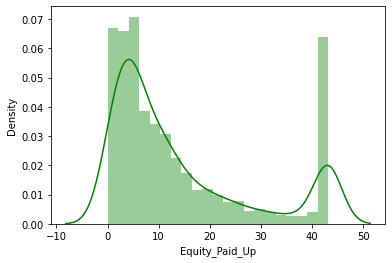


BoxPlot of Equity_Paid_Up
----------------------------------------------------------------------------


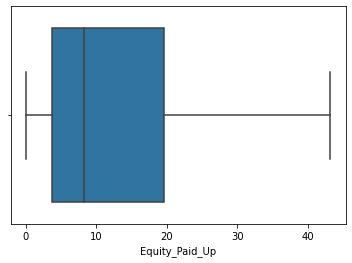

Distribution of Total_Debt
----------------------------------------------------------------------------


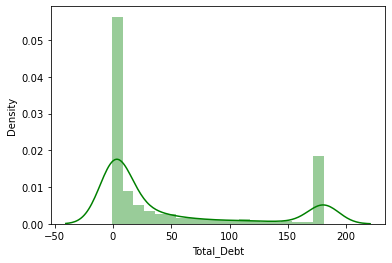


BoxPlot of Total_Debt
----------------------------------------------------------------------------


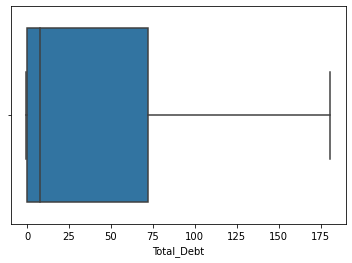

Distribution of Book_Value_Adj_Unit_Curr
----------------------------------------------------------------------------


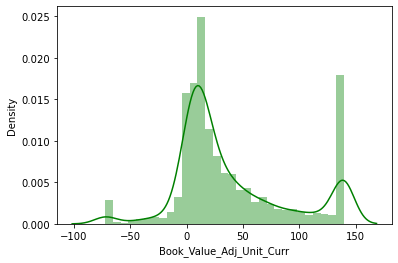


BoxPlot of Book_Value_Adj_Unit_Curr
----------------------------------------------------------------------------


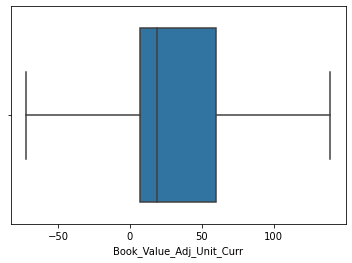

Distribution of CEPS
----------------------------------------------------------------------------


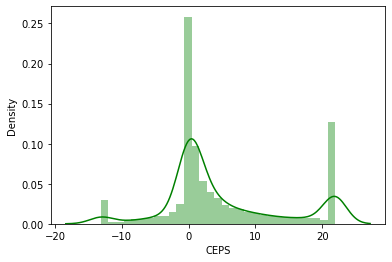


BoxPlot of CEPS
----------------------------------------------------------------------------


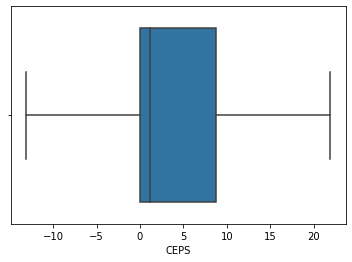

Distribution of Current_Ratio
----------------------------------------------------------------------------


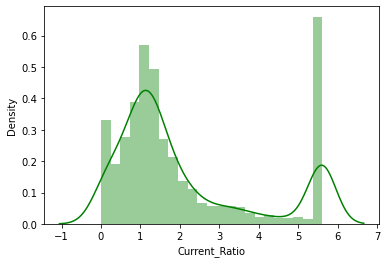


BoxPlot of Current_Ratio
----------------------------------------------------------------------------


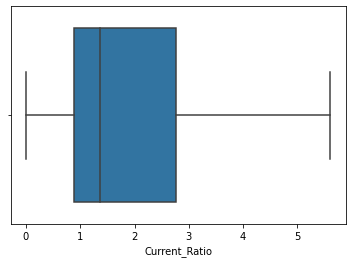

Distribution of PBITM
----------------------------------------------------------------------------


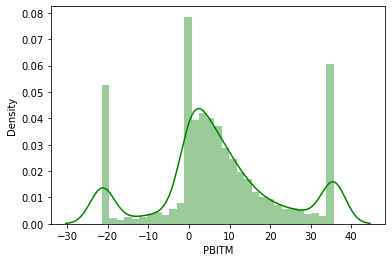


BoxPlot of PBITM
----------------------------------------------------------------------------


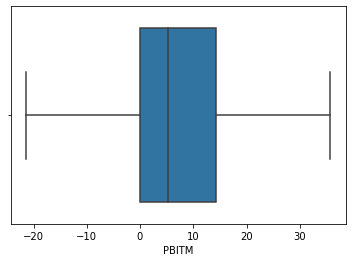

Distribution of Value_of_Output_Gross_Block
----------------------------------------------------------------------------


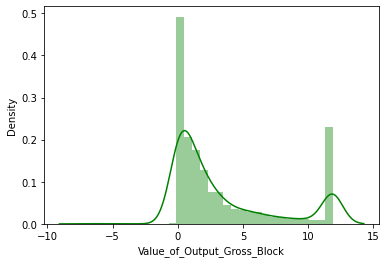


BoxPlot of Value_of_Output_Gross_Block
----------------------------------------------------------------------------


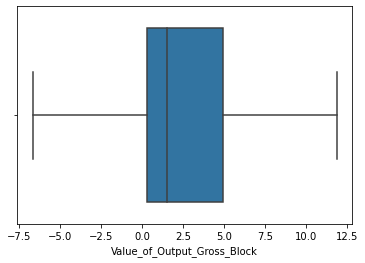

Distribution of Debtors_Velocity
----------------------------------------------------------------------------


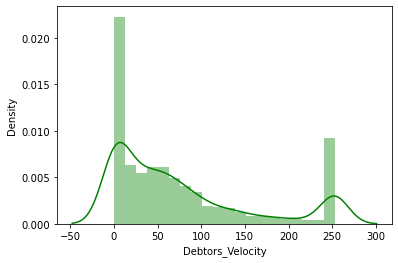


BoxPlot of Debtors_Velocity
----------------------------------------------------------------------------


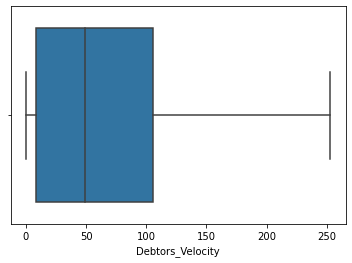

In [93]:
for col in imp_colmns:
    univariateAnalysis_numeric(col,20)

<Figure size 1440x1440 with 0 Axes>

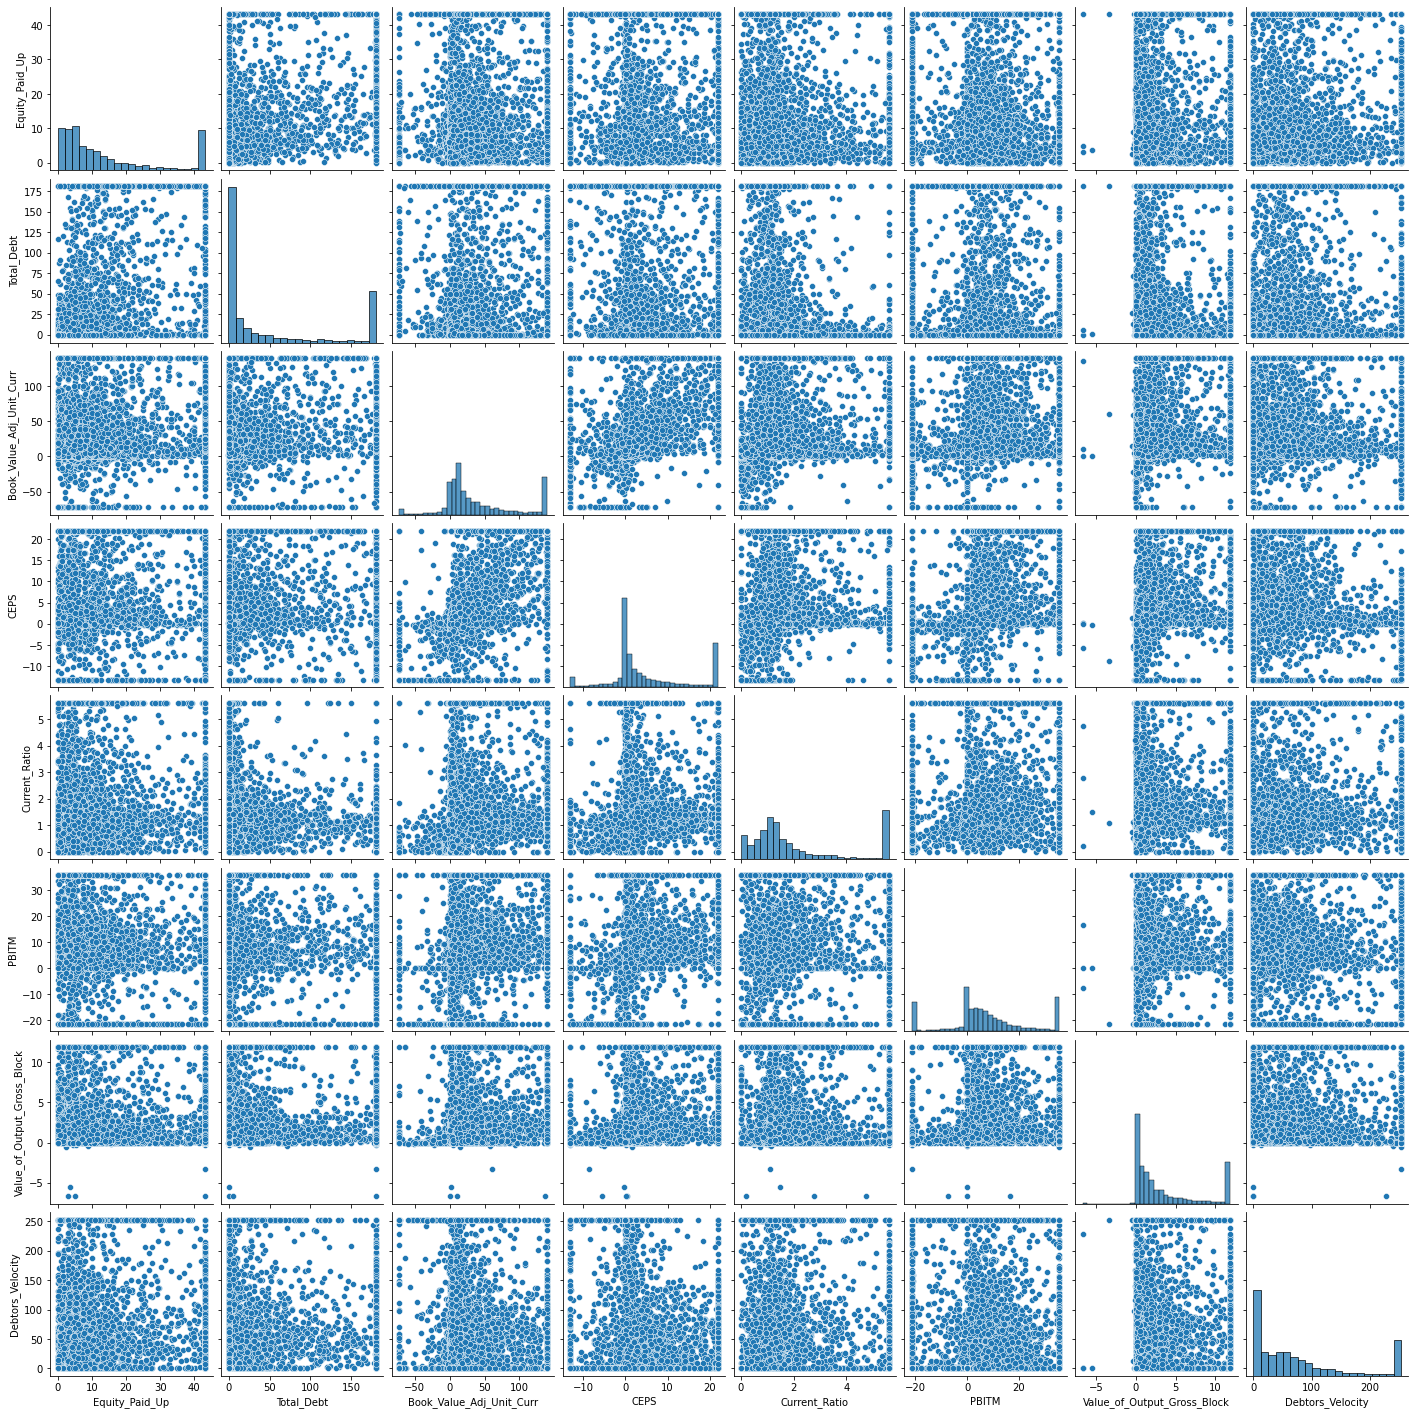

In [94]:
plt.figure(figsize=(20,20))  
p=sns.pairplot(data=df[imp_colmns])

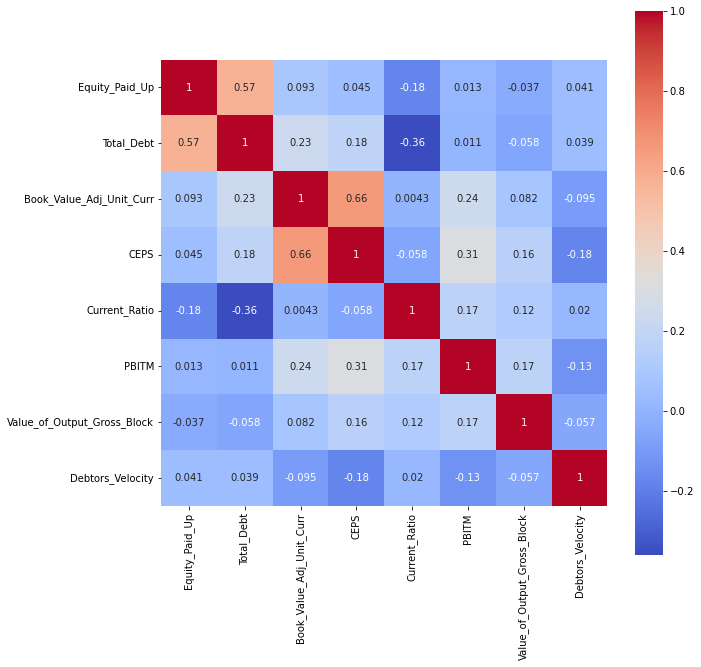

In [95]:
plt.figure(figsize=(10,10))  
p=sns.heatmap(df[imp_colmns].corr(), annot=True,cmap='coolwarm',square=True)

### Q 1.12 Compare the performances of Logistics, Radom Forest and LDA models (include ROC Curve)

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

AUC: 0.966


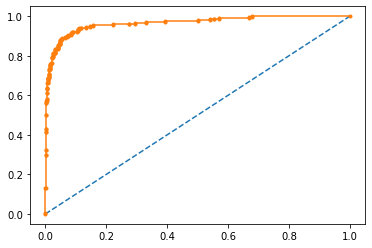

In [97]:
# LR - Train Data with 0.5 Threshold

auc = roc_auc_score(df_train['default'], y_prob_pred_train)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(df_train['default'], y_prob_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.829


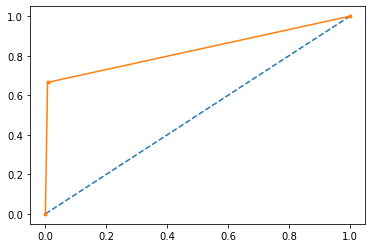

In [98]:
# LR - Train Data with 0.2 Threshold

auc = roc_auc_score(df_train['default'], y_class_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(df_train['default'], y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.976


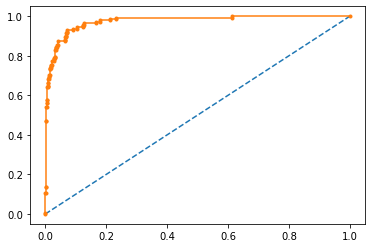

In [99]:
# LR - Test Data with 0.5 Threshold

auc = roc_auc_score(df_test['default'], y_prob_pred_test)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(df_test['default'], y_prob_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.928


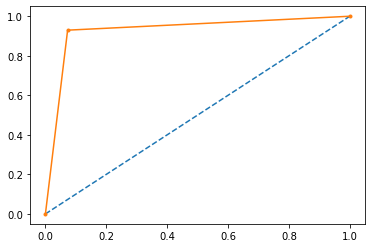

In [100]:
# LR - Test Data with 0.2 Threshold

auc = roc_auc_score(df_test['default'], y_class_pred_test)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(df_test['default'], y_class_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()